<a href="https://colab.research.google.com/github/LK2705/AI-Projects-LAUNCHED/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("/content/Sales_April_2019.csv")

# Clean the data
df.dropna(inplace=True)
df = df[df['Quantity Ordered'].apply(lambda x: str(x).isdigit())]

# Convert columns to numeric types
df['Quantity Ordered'] = df['Quantity Ordered'].astype(int)
df['Price Each'] = df['Price Each'].astype(float)

# Create a Sales column
df['Sales'] = df['Quantity Ordered'] * df['Price Each']

# Convert 'Order Date' to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

# Extract useful features
df['Month'] = df['Order Date'].dt.month
df['Hour'] = df['Order Date'].dt.hour

# Keep only relevant features
df = df[['Quantity Ordered', 'Price Each', 'Month', 'Hour', 'Sales']]
df.head()


/tmp/ipython-input-359304385.py:18: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')


,Quantity Ordered,Price Each,Month,Hour,Sales
0,2,11.95,4,8,23.90
2,1,99.99,4,22,99.99
3,1,600.00,4,14,600.00
4,1,11.99,4,14,11.99
5,1,11.99,4,9,11.99


In [2]:
from sklearn.model_selection import train_test_split

X = df[['Quantity Ordered', 'Price Each', 'Month', 'Hour']]
y = df['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [3]:
from sklearn.tree import DecisionTreeRegressor

# Create and train model
dt_model = DecisionTreeRegressor(max_depth=6, random_state=42)
dt_model.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=6, random_state=42)

In [4]:
from sklearn.metrics import mean_absolute_error, r2_score

# Predict on test set
y_pred = dt_model.predict(X_test)

# Evaluate performance
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Absolute Error: 0.18
R² Score: 1.00


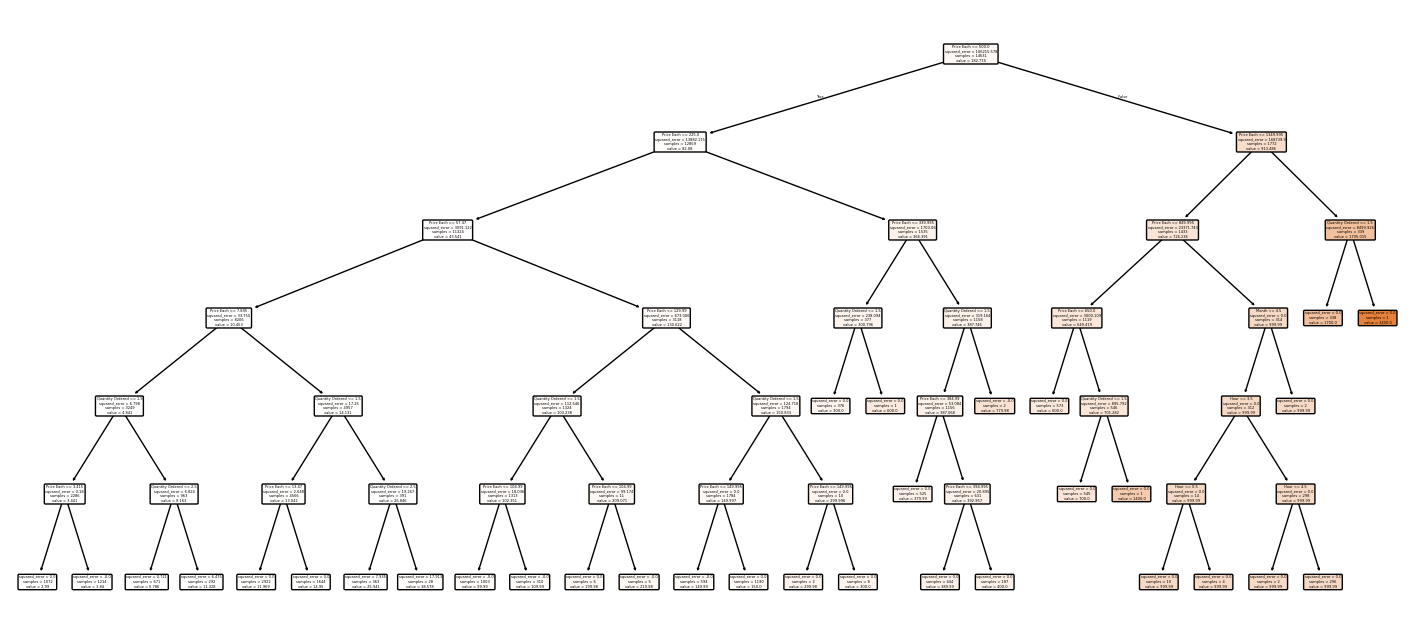

In [5]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(18,8))
tree.plot_tree(dt_model, feature_names=X.columns, filled=True, rounded=True)
plt.show()
